In [1]:
import pandas as pd
df = pd.read_csv("c:/data/titanic/train3.csv")

In [2]:
df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


In [3]:
df.columns

Index(['Survived', 'Pclass1', 'Pclass2', 'Pclass3', 'male', 'female', 'Age',
       'SibSp', 'Parch', 'Fare'],
      dtype='object')

In [19]:
cols=['Pclass1', 'Pclass2', 'Pclass3', 'male',
'female', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[cols] # 독립변수
y = df["Survived"]

In [5]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Survived'])
df2=pd.concat([X_samp,y_samp],axis=1)
X = X_samp[cols] # 독립변수
y = y_samp["Survived"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1000.0, random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("오분류 샘플개수 : %d" % (y_test != pred).sum())

오분류 샘플개수 : 27


In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" % accuracy_score(y_test, pred))
print("Precision : %.3f" % precision_score(y_test, pred))
print("Recall : %.3f" % recall_score(y_test, pred))
print("F1 : %.3f" % f1_score(y_test, pred))

Accuracy: 0.80
Precision : 0.806
Recall : 0.794
F1 : 0.800


In [9]:
from sklearn.metrics import confusion_matrix
y = [1, 0, 1, 1, 0, 1]
pred = [0, 0, 1, 1, 0, 1]
cm=confusion_matrix(y, pred)
print(cm)

[[2 0]
 [1 3]]


In [10]:
# TN(True Negative) : 0을 0으로 맞춘 경우
# FP(False Positive) : 0인데 1로 틀린 경우
# FN(False Negative) : 1인데 0으로 틀린 경우
# TP(True Positive) : 1을 1로 맞춘 경우
# ravel() 다차원배열을 1차원배열로 변환
tn,fp,fn,tp = confusion_matrix(y, pred).ravel()
print(tn,fp,fn,tp)

2 0 1 3


In [11]:
# tp / (tp+fp)
y = [0, 1, 0, 0]
pred = [0, 1, 1, 0]
# 모델이 2개를 1로 분류하였으나 실제 1인 개수는 1이므로 정밀도는 0.5
ps=precision_score(y, pred)
print(ps)

0.5


In [12]:
# recall(재현율, 검출율) : 실제값이 True인 것 중에서 모델이 True라고 예측한 것의 비율
# tp / (tp+fn)
# precision은 모델의 입장에서 recall은 실제 정답의 입장에서(바라보고자 하는 관점이 다름)
# 일반적으로 precision과 recall은 반비례 관계
y = [0, 1, 1, 0]
pred = [0, 1, 0, 0]
# 실제값이 1인 개수 2, 모델이 1로 맞춘 개수 1
recall_score(y, pred)

0.5

In [14]:
from sklearn.metrics import classification_report
import numpy as np
# f1-score : precision과 recall의 조화평균(불균형 데이터셋에 많이 사용하는 평가 지표)
# 2*p*r / p+r
# support : 실제값의 개수(0이 1개, 1이 3개)
# accuracy : 정확도
# macro avg : 단순평균(모든 클래스를 동일한 비중으로 고려)
# weighted avg : 각 클래스에 속하는 표본의 개수로 가중평균(f1-score와 같은 값)
y = np.array([0, 1, 1, 1])
pred = np.array([0, 1, 0, 0])
print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



In [15]:
# Cost : 기본값 1.0
# Cost가 크면 과대적합
# Cost가 낮으면 과소적합
# 실험을 통해 최적의 Cost 값을 얻어내는 코드
costs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
results=[]
for c in costs:
    params = {'C':c, 'max_iter': 1000}
    model = LogisticRegression(**params).fit(X_train, y_train)
    score=model.score(X_test,y_test)
    results.append(score)
print(results)

[0.6496350364963503, 0.781021897810219, 0.8029197080291971, 0.8029197080291971, 0.8029197080291971, 0.8029197080291971, 0.8029197080291971]


최고 정확도: 0.8029197080291971
최적의 C: 0.1


Text(0, 0.5, 'Accuracy')

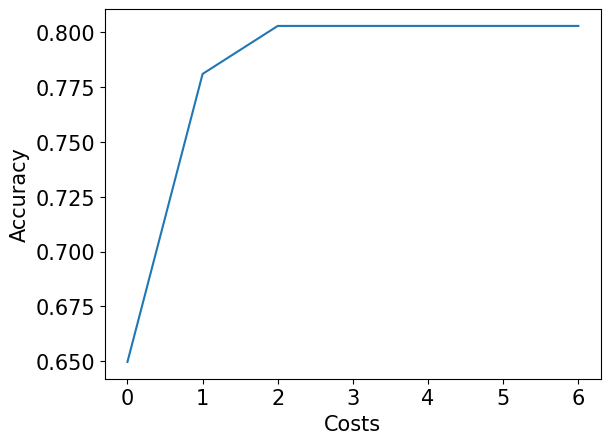

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
m=max(results)
for i,a in enumerate(results):
    if a==m:
        n=i
        break
print('최고 정확도:',m)
print('최적의 C:',costs[n])
plt.rcParams["font.size"]=15
plt.plot(range(len(costs)), results)
plt.xlabel('Costs')
plt.ylabel('Accuracy')